## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Report for Head of Analytics

## Data Validation

The first step of our analysis is checking if there are any duplicated rows or if there are any missing values. There are no duplicated rows, and there are 1074 missing values in the column revenue.

Then, we are going to analyse every column separately:
- week: int, values are 1 to 6 and there is nothing odd.
- sales_method: str, there are 5 categories and it should be 3 according to the notes. So, we merge 'Email' and 'email' and we do  same with 'em + call' and 'Email + Call'
- customer_id: str, every customer id is different, so we have to keep in mind that we cannot analyse multi purchases or behaviours over time of a single customer
- nb_sold: int, the number new products sold looks fine, ranges from 7 to 16, though the number 15 looks a fit inflated
- revenue: real, this column has 1074 missing values. Our method to replace those will be with the median groping by the sales method since they seem like different samples in a histogram. Range is fine, from 32.54  to 238.32 
- years_as_customer: int, there are two points which makes to sense, since the company is 40 years old, and there are two customer, one from 63 and other from 47 years ago. Since the rest of value are fine, we will not remove those.
- nb_site_vists: int, looks normal. Ranges from 12 to 41.
- state: str, looks fine. There are more sales in the coastside states than in the middle and north states.
        


## Exploratory analysis

Once the data has been cleaned up, we are able to proceed with the explorory analysis.

We will be addressing the points the Sales Rep required:

- How many customers were there for each approach?
 
In this case, the answer, is just counting the number of customers for each method of sales. You can see the result in this barchart:

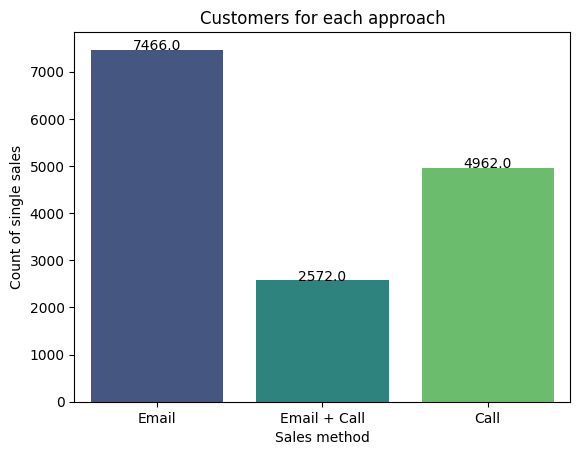

In [26]:
ax = sns.countplot(x="sales_method", data=sales, palette="viridis")


fig = plt.gcf()


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height}', ha="center")


plt.title("Customers for each approach")
plt.xlabel('Sales method')
plt.ylabel('Count of single sales')
plt.show()

- What does the spread of the revenue look like overall? And for each method?

The absolute and percentage spread of revenue por every sales method is:

1. Call: $ 236,445.16 (16.49%)
2. Email: $ 724,313.35 (50.53%)
3. Email + Call: $ 472,730.95 (32.98%)

As we can observe, the most significant sales method is 'Email', accounting for over half of the total income, followed by 'Email + Call' with almost 33%, and 'Call' is the least, contributing 16.49%.

Next, we will examine the distribution of individual sales, initially without distinguishing by sales method and subsequently differentiating by sales method using various colors.



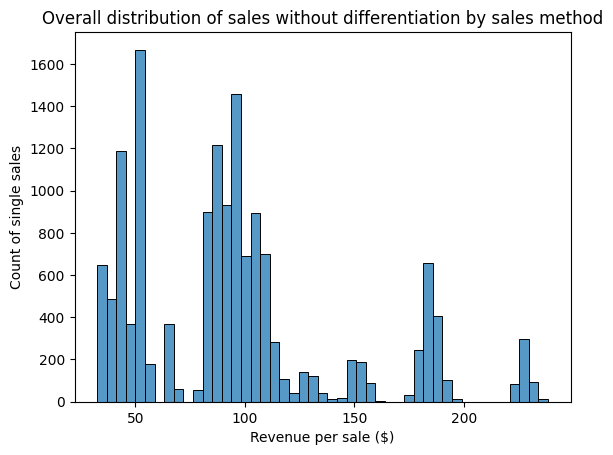

In [48]:
sns.histplot(data=sales,x="revenue")
plt.xlabel('Revenue per sale ($)')
plt.ylabel('Count of single sales')
plt.title("Overall distribution of sales without differentiation by sales method")
plt.show()

Observing this histogram, we can understand there are different segments in this customer sample. We can observe one group around 50, then another around 100 and the last one over 150. Most of the observations are around 100.

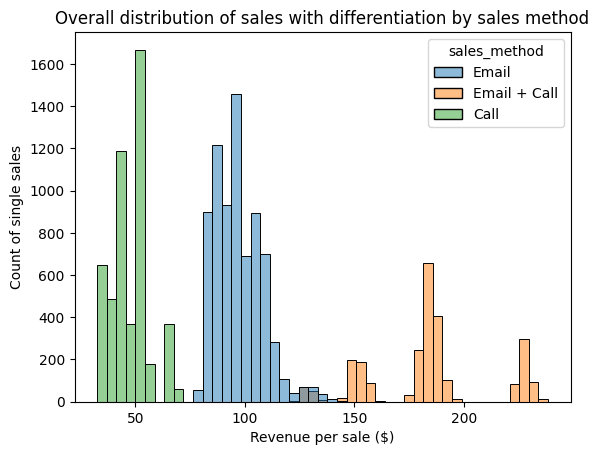

In [15]:
sns.histplot(data=sales,x="revenue",hue="sales_method")
plt.xlabel('Revenue per sale ($)')
plt.ylabel('Count of single sales')
plt.title("Overall distribution of sales with differentiation by sales method")
plt.show()

 In this histogram, we can observe:

- The "Call" method generates the least revenue per sale, suggesting it might primarily facilitate commercial transactions rather than high-value sales.
- The "Email" method yields almost twice the revenue per sale compared to "Call," which is significant given its lower cost. Therefore, it should be a primary focus for the sales department.
- The "Email + Call" method shows a less uniform distribution but achieves the highest revenue per sale. This suggests a more personalized sales approach, likely leading to greater productivity.

Now we have a clear idea of the revenue distribution of the three sales methods. The next variable to observe is time:

- Was there any difference in revenue over time for each of the methods?

To answer this question, we have created a graph of total revenue per week for each sales method, so we can clearly see the evolution over time:

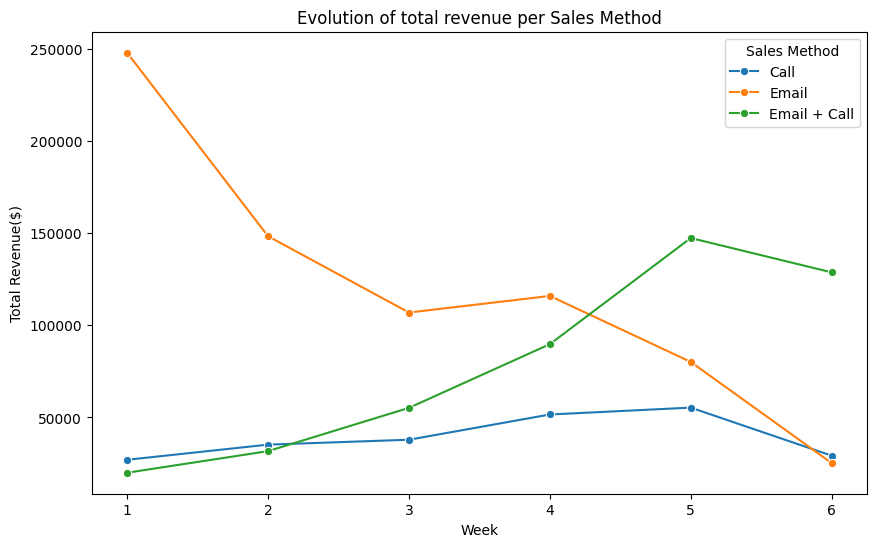

In [17]:

grouped_data = sales.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='week', y='revenue', hue='sales_method', marker='o')


plt.title('Evolution of total revenue per Sales Method')
plt.xlabel('Week')
plt.ylabel('Total Revenue($)')
plt.legend(title='Sales Method')


plt.show()

In this graph, we can observe:

- The "Call" method generates an almost constant revenue over time, but this revelue is the lowest at almost all points.
- The "Email" method starts the cicle with the highest impact but decreases a lot over time, almost reaching the 0 at the end.
- The "Email + Call" method is the only one that increases over time, with makes it the most interesting method to invest in in the future.

Although we will address this topic in detail at the end of the report, it is worth mentioning here that if we were to discontinue a method, it would be 'Call'. After the initial success of 'Email', we would recommend transitioning to the 'Email + Call' method.

In addition to these points, we have also analyzed 'years_as_customer' and 'nb_site_visits':

- For 'years_as_customer', we observed that most of the revenue comes from customers who have been with us for 5 years or less.
- Regarding 'nb_site_visits', we found that customers who regularly visit the website are more likely to make purchases. However, we do not consider this to be the most significant metric.
- As for 'state', although the distribution is relatively uniform, our analysis indicates that coastal and southern states tend to have better customers than those in the middle and northern regions.


## Metric for the business

Using the data available, a key metric to observe for evaluating the impact of the sales method when launching a new product is the median revenue per item. This can be calculated by dividing the revenue by the number of items sold (nb_sold). We have generated the following graph:

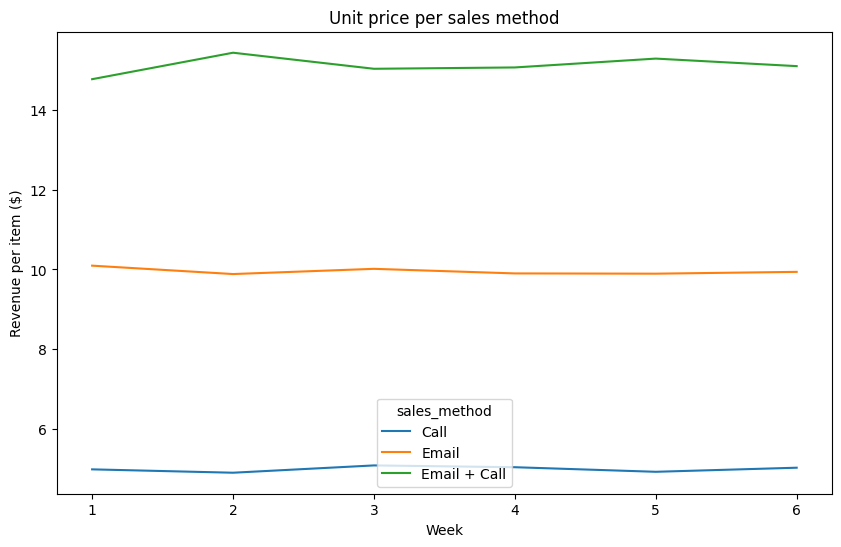

In [10]:
grouped_data5 = sales.groupby(['week', 'sales_method'])['revenue_per_item'].median().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data5, y='revenue_per_item', x='week', hue='sales_method')
plt.ylabel("Revenue per item ($)")
plt.xlabel("Week")
plt.title("Unit price per sales method")
plt.show()

We have observed significant differences in the unit prices across the three categories. This suggests distinct customer segments for each category. Monitoring and enhancing this metric is crucial, as a higher unit price directly correlates with improved sales productivity.

## Summary

The main purpose of this report is to help the company obtain better information on which sales method to use for new products. We understand that this is a crucial aspect of the business, as it fosters trust in continuous innovation and keeps customers satisfied by working with a company that is always evolving.

Our recommendations for the company, based on the findings from our data analysis, are as follows:

- We should discontinue using the 'Call' method as a primary source of income. It requires the most labor hours (30 min/call), yields the lowest unit price, and generates the least total revenue.
- We believe we should continue utilizing the 'Email' method, as it proves most effective for early adopters.
- The best method to invest in appears to be 'Email + Call'. Our analysis suggests that customers who were only contacted via call would have placed larger orders if the approach had been 'Email + Call'. Given its positive sales trend over time, this method is our best option.
- We should enhance our data collection by obtaining time series data for every customer. This will allow us to improve our marketing strategies and information dissemination.